In [38]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
pwd

'C:\\Users\\amit0\\OneDrive\\Desktop\\Exploratory project0'

In [42]:
root = 'C:\\Users\\amit0\\OneDrive\\Desktop\\Exploratory project0\\'

In [44]:
# import os
# len(os.listdir(root+'image_data\\muscovite'))

In [250]:
# Load the model from the saved file
from tensorflow.keras.models import load_model
loaded_model = load_model(root+'mineral_model_19.h5')
import pickle
with open(root+'label_encoder_1.pkl', 'rb') as f:
    loaded_label_encoder = pickle.load(f)

In [251]:
import requests
def download_image(url, filename):
    response = requests.get(url)
    with open(root+'image_test\\'+filename, 'wb') as f:
        f.write(response.content)  # Write the image content to the file
    print(f"Image downloaded successfully: {filename}")

In [254]:
# image_url = "https://t3.ftcdn.net/jpg/07/65/81/90/240_F_765819061_ZhD5xs8ef5tU58lWG8LHgBGkuQq7KPBw.jpg" 
# download_image(image_url, "biotite.jpg")

In [270]:
file = 'muscoTest1.jpeg'

In [272]:
image_path = root+'image_test\\'+file
image_path

'C:\\Users\\amit0\\OneDrive\\Desktop\\Exploratory project0\\image_test\\muscoTest1.jpeg'

(203, 249, 3)


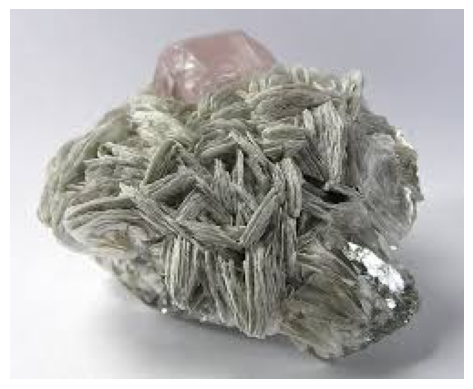

In [274]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
print(img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off the axis
plt.show()

In [276]:
img_resized = cv2.resize(img, (224, 224))
scale_img = img_resized/255.0
test_img = np.expand_dims(scale_img, axis=0)
img_resized.shape

(224, 224, 3)

In [264]:
# Make predictions with the loaded model
predictions = loaded_model.predict(test_img)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


array([[0.02565387, 0.05092448, 0.10511512, 0.02581115, 0.22384705,
        0.2198901 , 0.3487583 ]], dtype=float32)

In [266]:
# Further steps for post-processing the predictions (e.g., decoding with LabelEncoder)
predicted_class = np.argmax(predictions, axis=1)
predicted_class

array([6], dtype=int64)

In [268]:
predicted_label = loaded_label_encoder.inverse_transform(predicted_class)
print("It is",predicted_label[0])

It is quartz


## testing on multiple images

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
root = 'C:\\Users\\amit0\\OneDrive\\Documents\\Exploratotry_Project'

In [ ]:
# Load the model from the saved file
from tensorflow.keras.models import load_model
loaded_model = load_model(root+'mineral_model_1.h5')
import pickle
with open(root+'label_encoder_1.pkl', 'rb') as f:
    loaded_label_encoder = pickle.load(f)

In [38]:
test_image_paths = []
for files in os.listdir(root+'image_test\\'):
    if(files.endswith('.jpg') or files.endswith('.jpeg')):
        test_image_paths.append('image_test\\'+files)
len(test_image_paths), test_image_paths[:5]

(7,
 ['image_test\\biotite.jpg',
  'image_test\\bornite.jpg',
  'image_test\\chysocolla.jpeg',
  'image_test\\malachite_test.jpeg',
  'image_test\\muscovite.jpeg'])

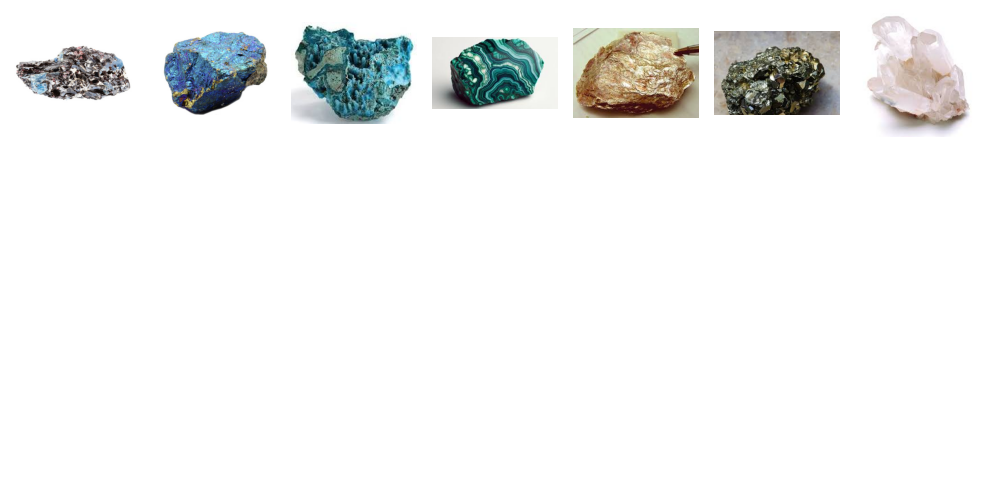

In [47]:
rows = 2
cols = 7
fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
show_images_sample = test_image_paths[:14]
for i, ax in enumerate(axes.flat):
    if i < len(show_images_sample):
        img = cv2.imread(show_images_sample[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        ax.imshow(img)
        ax.axis('off')  # Turn off the axis
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [54]:
test_images = []
for i in tqdm(range(len(test_image_paths))):
    img = cv2.imread(test_image_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    test_images.append(img)
len(test_images) , test_images[0].shape

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 597.83it/s]


(7, (240, 440, 3))

In [57]:
target_length = 224
target_width = 224
test_resized_images = []
for i in tqdm(range(len(test_images))):
    img_resized = cv2.resize(test_images[i], (target_length, target_width))
    test_resized_images.append(img_resized)
test_resized_images[0].shape

100%|████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<?, ?it/s]


(224, 224, 3)

In [61]:
test_scale_images = []
for i in tqdm(range(len(test_resized_images))):
    scale_img = test_resized_images[i]/255.0
    test_scale_images.append(scale_img)
test_scale_images[0].shape

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 721.18it/s]


(224, 224, 3)

In [72]:
X_testing = np.array(test_scale_images)
X_testing.shape

(7, 224, 224, 3)

In [76]:
# Make predictions with the loaded model
test_predictions = loaded_model.predict(X_testing)
test_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[4.99835843e-03, 3.18305977e-02, 7.12543761e-06, 3.85746789e-05,
        5.18606626e-04, 9.62606013e-01, 6.97778717e-07],
       [4.56634210e-04, 9.83248115e-01, 1.60693265e-02, 2.20796617e-04,
        1.67631047e-08, 4.69561610e-06, 3.60765540e-07],
       [6.72051286e-08, 6.34479647e-06, 9.18273151e-01, 8.17179307e-02,
        2.22985051e-07, 3.46021558e-08, 2.15845535e-06],
       [1.39290728e-06, 2.60079491e-06, 1.60405800e-01, 8.39587450e-01,
        9.80585710e-08, 1.14166664e-06, 1.49917184e-06],
       [6.53284020e-04, 6.82234298e-03, 2.61218811e-04, 1.09814406e-04,
        6.99352860e-01, 1.31221801e-01, 1.61578745e-01],
       [1.13882227e-02, 4.65936912e-03, 1.51645404e-03, 1.52299991e-02,
        1.12955635e-02, 9.55820739e-01, 8.95981502e-05],
       [1.16206811e-05, 2.14829106e-05, 8.47592091e-05, 6.47966517e-05,
        1.50912860e-02, 6.43622188e-05, 9.84661758e-01]], dtype=float32)

In [78]:
# Further steps for post-processing the predictions (e.g., decoding with LabelEncoder)
test_predicted_class = np.argmax(test_predictions, axis=1)
test_predicted_class

array([5, 1, 2, 3, 4, 5, 6], dtype=int64)

In [84]:
test_predicted_label = loaded_label_encoder.inverse_transform(test_predicted_class)
test_predicted_label

array(['pyrite', 'bornite', 'chrysocolla', 'malachite', 'muscovite',
       'pyrite', 'quartz'], dtype='<U11')